In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold

# For reproducibility
np.random.seed(1000)

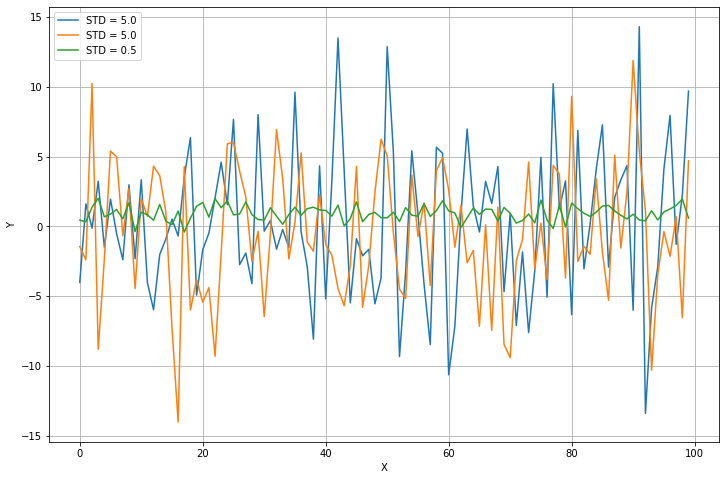

In [3]:
# Create a dummy dataset
X = np.ndarray(shape=(100, 3))

X[:, 0] = np.random.normal(0.0, 5.0, size=100)
X[:, 1] = np.random.normal(0.5, 5.0, size=100)
X[:, 2] = np.random.normal(1.0, 0.5, size=100)

# Show the dataset
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.plot(X[:, 0], label='STD = 5.0')
ax.plot(X[:, 1], label='STD = 5.0')
ax.plot(X[:, 2], label='STD = 0.5')

plt.legend()
plt.show()

In [4]:
# Impose a variance threshold
print('Samples before variance thresholding')
print(X[0:3, :])

vt = VarianceThreshold(threshold=1.5)
X_t = vt.fit_transform(X)

# After the filter has removed the componenents
# The 3rd feature will be removed.
print('Samples after variance thresholding')
print(X_t[0:3, :])

Samples before variance thresholding
[[-4.02229152 -1.45159675  0.44213339]
 [ 1.60465774 -2.40348169  0.3276144 ]
 [-0.1274144  10.24493485  1.37667187]]
Samples after variance thresholding
[[-4.02229152 -1.45159675]
 [ 1.60465774 -2.40348169]
 [-0.1274144  10.24493485]]


In [5]:
from sklearn.datasets import load_boston, load_iris
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_regression

In [9]:
# Load Boston data
regr_data = load_boston()
print('Boston data shape')
print(regr_data.data.shape)

# Select the best k features with regression test
kb_regr = SelectKBest(f_regression)
X_b = kb_regr.fit_transform(regr_data.data, regr_data.target)
print('K-Best-filtered Boston dataset shape')
print(X_b.shape)
print('K-Best scores')
print(kb_regr.scores_)


Boston data shape
(506, 13)
K-Best-filtered Boston dataset shape
(506, 10)
K-Best scores
[ 89.48611476  75.2576423  153.95488314  15.97151242 112.59148028
 471.84673988  83.47745922  33.57957033  85.91427767 141.76135658
 175.10554288  63.05422911 601.61787111]


In [10]:
# Load iris data
class_data = load_iris()
print('Iris dataset shape')
print(class_data.data.shape)

# Select the best k features using Chi^2 classification test
perc_class = SelectPercentile(chi2, percentile=15)
X_p = perc_class.fit_transform(class_data.data, class_data.target)
print('Chi2-filtered Iris dataset shape')
print(X_p.shape)

Iris dataset shape
(150, 4)
Chi2-filtered Iris dataset shape
(150, 1)
